In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# 1) Интерполяционный многочлен Лагранжа для функции, заданной таблично.

In [2]:
x = sp.symbols("x")

In [3]:
x_numbers = np.array([-2, -1, 0, 1, 3])
y_numbers = np.array([86, 17, 2, -7, 161])
n = len(x_numbers)

In [4]:
w = sp.prod([x - i for i in x_numbers])
w

x*(x - 3)*(x - 1)*(x + 1)*(x + 2)

In [5]:
df_w = sp.diff(w)

In [6]:
L = sp.simplify(sum([y_numbers[i] * (w/((x-x_numbers[i])*df_w.subs({x: x_numbers[i]}))) 
                     for i in range(n)]))
L

3*x**4 - 2*x**3 - 10*x + 2

In [7]:
[L.subs({x:x_numbers[i]}) for i in range(n)]

[86, 17, 2, -7, 161]

# 2) Интерполяционный многочлен Лагранжа для заданной функции 𝑓(𝑥) с заданными узлами. Погрешность интерполяции.

In [50]:
x = sp.symbols("x")

In [51]:
f = 3**(-x)

In [53]:
x_numbers = np.array([-2, -1, 0, 1])
n = len(x_numbers)

In [54]:
y_numbers = [f.subs({x:x_numbers[i]}) for i in range(n)]
y_numbers

[9, 3, 1, 1/3]

In [55]:
w = sp.prod([x - i for i in x_numbers])

In [56]:
df_w = sp.diff(w)

In [57]:
L = sp.simplify(sum([y_numbers[i] * (w/((x-x_numbers[i])*df_w.subs({x: x_numbers[i]}))) 
                     for i in range(n)]))
L

-4*x**3/9 + 2*x**2/3 - 8*x/9 + 1

In [58]:
[L.subs({x:x_numbers[i]}) for i in range(n)]

[9, 3, 1, 1/3]

Оценка погрешности

In [59]:
f = 3**(-x)

In [60]:
for _ in range(n + 1):
    df_f = sp.diff(f)
df_f

-3**(-x)*log(3)

In [61]:
M = max([np.abs(df_f.subs({x: i})) for i in np.linspace(np.min(x_numbers), np.max(x_numbers), 100)])
M

9.0*log(3)

In [63]:
r = (M / sp.prod([i + 1 for i in range(n + 1)]))*abs(w)
r

0.075*log(3)*Abs(x*(x - 1)*(x + 1)*(x + 2))

In [64]:
sp.simplify(max([np.abs(r.subs({x: i})) for i in np.linspace(np.min(x_numbers), np.max(x_numbers), 100)]))

0.0823374902958209

# 3) Интерполяционный многочлен Ньютона для функции, заданной таблично.

In [108]:
x = sp.symbols("x")

In [109]:
x_numbers = np.array([-2, -1, 0, 1, 3])
y_numbers = np.array([86, 17, 2, -7, 161])
n = len(x_numbers)

In [110]:
f = np.zeros((5, 5))
for i in range(n):
    f[0][i] = y_numbers[i]

In [111]:
for k in range(1, n):
    for i in range(n - k):
        f[k][i] = (f[k - 1][i + 1] - f[k - 1][i]) / (x_numbers[i + k]-x_numbers[i])
f.T

array([[ 86., -69.,  27.,  -8.,   3.],
       [ 17., -15.,   3.,   7.,   0.],
       [  2.,  -9.,  31.,   0.,   0.],
       [ -7.,  84.,   0.,   0.,   0.],
       [161.,   0.,   0.,   0.,   0.]])

In [112]:
w = 1
N = f[0][0]
for i in range(1, n):
    w *= (x - x_numbers[i - 1])
    N += f[i][0] * w
N

3.0*x*(x - 1)*(x + 1)*(x + 2) - 8.0*x*(x + 1)*(x + 2) - 69.0*x + 27.0*(x + 1)*(x + 2) - 52.0

In [113]:
sp.simplify(N)

3.0*x**4 - 2.0*x**3 - 10.0*x + 2.0

In [114]:
[N.subs({x:x_numbers[i]}) for i in range(n)]

[86.0000000000000,
 17.0000000000000,
 2.00000000000000,
 -7.00000000000000,
 161.000000000000]

# 4) Интерполяционный многочлен Ньютона для заданной функции 𝑓(𝑥) с заданными узлами. Погрешность интерполяции.

In [91]:
x = sp.symbols("x")

In [92]:
f = 3**(-x)

In [93]:
x_numbers = np.array([-2, -1, 0, 1])
n = len(x_numbers)

In [94]:
y_numbers = [f.subs({x:x_numbers[i]}) for i in range(n)]
y_numbers

[9, 3, 1, 1/3]

In [95]:
f = np.zeros((5, 5))
for i in range(n):
    f[0][i] = y_numbers[i]

In [96]:
for k in range(1, n):
    for i in range(n - k):
        f[k][i] = (f[k - 1][i + 1] - f[k - 1][i]) / (x_numbers[i + k]-x_numbers[i])
f.T

array([[ 9.        , -6.        ,  2.        , -0.44444444,  0.        ],
       [ 3.        , -2.        ,  0.66666667,  0.        ,  0.        ],
       [ 1.        , -0.66666667,  0.        ,  0.        ,  0.        ],
       [ 0.33333333,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [97]:
w = 1
N = f[0][0]
for i in range(1, n):
    w *= (x - x_numbers[i - 1])
    N += f[i][0] * w
N

-0.444444444444444*x*(x + 1)*(x + 2) - 6.0*x + 2.0*(x + 1)*(x + 2) - 3.0

In [98]:
sp.simplify(N)

-0.444444444444444*x**3 + 0.666666666666667*x**2 - 0.888888888888889*x + 1.0

In [99]:
[N.subs({x:x_numbers[i]}) for i in range(n)]

[9.00000000000000, 3.00000000000000, 1.00000000000000, 0.333333333333333]

Оценка погрешности

In [100]:
f = 3**(-x)

In [101]:
for _ in range(n + 1):
    df_f = sp.diff(f)
df_f

-3**(-x)*log(3)

In [102]:
M = max([np.abs(df_f.subs({x: i})) for i in np.linspace(np.min(x_numbers), np.max(x_numbers), 100)])
M

9.0*log(3)

In [103]:
r = (M / sp.prod([i + 1 for i in range(n + 1)]))*abs(sp.prod([x - i for i in x_numbers]))
r

0.075*log(3)*Abs(x*(x - 1)*(x + 1)*(x + 2))

In [104]:
sp.simplify(max([np.abs(r.subs({x: i})) for i in np.linspace(np.min(x_numbers), np.max(x_numbers), 100)]))

0.0823374902958209

# 5) Интерполяционный многочлен Эрмита.

In [5]:
x = sp.symbols("x")
a = list()
for i in range(8):
    i = sp.symbols("a" + str(i))
    a.append(i)

In [18]:
x_numbers = np.array([0, 1, 2])
y_numbers = np.array([2, 3, 130])
y_numbers_diff_1 = np.array([0, 7, 448])
y_numbers_diff_2 = np.array([0, 42, None])
n = len(x_numbers)

In [23]:
H = 0
for i in range(8):
    H += a[i]*x**i
dH1 = sp.diff(H, x)
dH2 = sp.diff(dH1, x)
H

a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + a5*x**5 + a6*x**6 + a7*x**7

In [29]:
solution = list()
for i in range(3):
    solution.append(H.subs({x:x_numbers[i]}) - y_numbers[i])
for i in range(3):
    solution.append(dH1.subs({x:x_numbers[i]}) - y_numbers_diff_1[i])
for i in range(3):
    if y_numbers_diff_2[i] != None:
        solution.append(dH2.subs({x:x_numbers[i]}) - y_numbers_diff_2[i])
solution1 = sp.solve(solution, (a[0], a[1], a[2], a[3], a[4], a[5], a[6], a[7]))
solution1

{a0: 2, a1: 0, a2: 0, a3: 0, a4: 0, a5: 0, a6: 0, a7: 1}

In [53]:
H1 = H.subs(solution1)
H2 = dH1.subs(solution1)
H3 = dH2.subs(solution1)
H1

x**7 + 2

In [55]:
for i in range(3):
    print(H1.subs({x:x_numbers[i]}), end = " ")
print()
for i in range(3):
    print(H2.subs({x:x_numbers[i]}), end = " ")
print()
for i in range(2):
    print(H3.subs({x:x_numbers[i]}), end = " ")

2 3 130 
0 7 448 
0 42 

# 6) Интерполяционный кубический сплайн для функции из 1).

In [2]:
x_numbers = np.array([-2, -1, 0, 1, 3])
y_numbers = np.array([86, 17, 2, -7, 161])
n = len(x_numbers)

In [3]:
x, h = sp.symbols("x, h ")
M_num = list()
for i in range(5):
    i = sp.symbols("M" + str(i))
    M_num.append(i)
M_num

[M0, M1, M2, M3, M4]

In [4]:
f = np.zeros((5, 5))
for i in range(n):
    f[0][i] = y_numbers[i]
    
for k in range(1, n):
    for i in range(n - k):
        f[k][i] = (f[k - 1][i + 1] - f[k - 1][i]) / (x_numbers[i + k]-x_numbers[i])
f = f.T
A = f[0][2]
B = f[2][2]

In [5]:
solution = list()
h = 0
for i in range(1, 4):
    h = x_numbers[i + 1] - x_numbers[i]
    h_ = x_numbers[i] - x_numbers[i - 1]
    solution.append((M_num[i-1] * h_) / 6 + (M_num[i] * (h_ + h)) / 3 + (M_num[i + 1] * h) / 6 - 
                    (y_numbers[i + 1] - y_numbers[i]) / h + (y_numbers[i] - y_numbers[i - 1]) / h_)
solution.append(M_num[0] - A)
solution.append(M_num[4] - B)
sol = sp.solve(solution, (M_num[0], M_num[1], M_num[2], M_num[3], M_num[4]))
sol

{M0: 27.0000000000000,
 M1: 135.500000000000,
 M2: 297.000000000000,
 M3: -99.5000000000000,
 M4: 31.0000000000000}

In [6]:
s3 = list()
h = 0
for i in range(4):
    h = x_numbers[i + 1] - x_numbers[i]
    #tmp = - M_num[i] / (6 *h) * (x - x_numbers[i + 1]) ** 3 + M_num[i + 1] / (6 *h) * (x - x_numbers[i]) ** 3 + ((y_numbers[i + 1] - y_numbers[i]) / h - h/6 * (M_num[i + 1] - M_num[i])) * (x - x_numbers[i]) + y_numbers[i] - M_num[i] * h * h /6
    #tmp.subs(sol)
    s3.append((- M_num[i] / (6 *h) * (x - x_numbers[i + 1]) ** 3 + M_num[i + 1] / (6 *h) * (x - x_numbers[i]) ** 3 + ((y_numbers[i + 1] - y_numbers[i]) / h - h/6 * (M_num[i + 1] - M_num[i])) * (x - x_numbers[i]) + y_numbers[i] - M_num[i] * h * h /6).subs(sol))

In [7]:
s3

[-87.0833333333333*x - 4.5*(x + 1)**3 + 22.5833333333333*(x + 2)**3 - 92.6666666666667,
 -22.5833333333333*x**3 - 41.9166666666667*x + 49.5*(x + 1)**3 - 47.5,
 -16.5833333333333*x**3 + 57.0833333333333*x - 49.5*(x - 1)**3 - 47.5,
 40.5*x + 8.29166666666667*(x - 3)**3 + 2.58333333333333*(x - 1)**3 + 18.8333333333333]

In [8]:
for i in range(4):
    print(str(s3[i]) + ' - [' +  str(x_numbers[i]) + ', ' +  str(x_numbers[i+1]) + ']')

-87.0833333333333*x - 4.5*(x + 1)**3 + 22.5833333333333*(x + 2)**3 - 92.6666666666667 - [-2, -1]
-22.5833333333333*x**3 - 41.9166666666667*x + 49.5*(x + 1)**3 - 47.5 - [-1, 0]
-16.5833333333333*x**3 + 57.0833333333333*x - 49.5*(x - 1)**3 - 47.5 - [0, 1]
40.5*x + 8.29166666666667*(x - 3)**3 + 2.58333333333333*(x - 1)**3 + 18.8333333333333 - [1, 3]


# 7) Интерполяционный кубический сплайн для функции из 2).

In [166]:
x = sp.symbols("x")
M_num = list()
for i in range(4):
    i = sp.symbols("M" + str(i))
    M_num.append(i)
M_num

[M0, M1, M2, M3]

In [167]:
f = 3**(-x)

In [168]:
x_numbers = np.array([-2, -1, 0, 1])
n = len(x_numbers)

In [169]:
y_numbers = [f.subs({x:x_numbers[i]}) for i in range(n)]
y_numbers

[9, 3, 1, 1/3]

In [170]:
df1 = sp.diff(f, x)
df2 = sp.diff(df1, x)

In [171]:
solution = list()
h = 0
for i in range(1, 3):
    h = x_numbers[i + 1] - x_numbers[i]
    h_ = x_numbers[i] - x_numbers[i - 1]
    solution.append((M_num[i-1] * h_) / 6 + (M_num[i] * (h_ + h)) / 3 + (M_num[i + 1] * h) / 6 - 
                    (y_numbers[i + 1] - y_numbers[i]) / h + (y_numbers[i] - y_numbers[i - 1]) / h_)
solution.append(M_num[0] - df2.subs({x:x_numbers[0]}))
solution.append(M_num[3] - df2.subs({x:x_numbers[3]}))
sol = sp.solve(solution, (M_num[0], M_num[1], M_num[2], M_num[3]))
sol

{M0: 9*log(3)**2,
 M1: 88/15 - 107*log(3)**2/45,
 M2: 8/15 + 23*log(3)**2/45,
 M3: log(3)**2/3}

In [172]:
global s3
s3 = list()
h = 0
for i in range(3):
    h = x_numbers[i + 1] - x_numbers[i]
    s3.append(((-M_num[i]) / (6 *h) * ((x - x_numbers[i + 1]) ** 3) + M_num[i + 1] / (6 *h) * ((x - x_numbers[i]) ** 3) + 
               (((y_numbers[i + 1] - y_numbers[i]) / h - h/6 * (M_num[i + 1] - M_num[i])) * (x - x_numbers[i])) + y_numbers[i] - (M_num[i] * h * h )/6).subs(sol))

In [173]:
for i in range(3):
    s3[i] = sp.N(s3[i])
for i in range(3):
    print(str(s3[i]) + ' - [' +  str(x_numbers[i]) + ', ' +  str(x_numbers[i+1]) + ']')

-4.68904493357021*x + 3.9957469983127*(0.5*x + 1)**3 - 1.81042344121887*(x + 1.0)**3 - 2.1885133083593 - [-2, -1]
-0.499468374789088*x**3 - 1.69223468483569*x + 0.191703059624776*(x + 1.0)**3 + 0.808296940375224 - [-1, 0]
0.0670527200451434*x**3 - 0.542016327087035*x - 0.191703059624776*(x - 1.0)**3 + 0.808296940375224 - [0, 1]


In [174]:
def s(num):
    for i in range(n - 1):
        if x_numbers[i] < num < x_numbers[i+1]:
            return s3[i].subs({x:num})

In [175]:
f = 3**(-x)
f1 = sp.lambdify(x, f)
f2 = np.vectorize(s)

In [178]:
t = np.arange(x_numbers[0], x_numbers[3], 0.01)

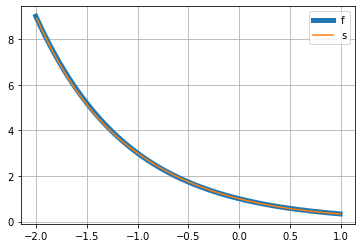

In [179]:
plt.plot(t, f1(t), label = 'f', linewidth=5.0)
plt.plot(t, f2(t), label = 's')
plt.grid()
plt.legend()
plt.show()

# 8) Метод наименьших квадратов, прямая линейной регрессии, аппроксимирующаю функцию, заданную таблично.

In [164]:
x = sp.symbols("x")

In [165]:
x_numbers = np.array([-2, -1, 1, 2, 3, 4, 5])
y_numbers = np.array([3.121, 3.314, 3.276, 3.198, 3.155, 3.142, 3.211])
n = len(x_numbers)
m = 1

In [166]:
a_list = list()
for i in range(m + 1):
    i = sp.symbols("a" + str(i))
    a_list.append(i)
a_list

[a0, a1]

In [167]:
s = list()
t = list()
for k in range(2*m + 1):
    s.append(sum(x_numbers[i] ** k for i in range(n)))
s[0] = n
for k in range(m + 1):
    t.append(sum(y_numbers[i] * (x_numbers[i] ** k) for i in range(n)))
s, t

([7, 12, 60], [22.416999999999998, 38.204])

In [168]:
solution = list()
for i in range(m + 1):
    solution.append(s[i] * a_list[0] + s[i + 1] * a_list[1] - t[i])
sol = sp.solve(solution, (a_list[0], a_list[1]))
solution, sol

([7*a0 + 12*a1 - 22.417, 12*a0 + 60*a1 - 38.204],
 {a0: 3.21221739130435, a1: -0.00571014492753623})

In [169]:
Q = sol[a_list[1]] * x + sol[a_list[0]]
Q

3.21221739130435 - 0.00571014492753623*x

In [170]:
f1 = sp.lambdify(x, Q)

In [171]:
t = np.arange(x_numbers[0], x_numbers[n - 1], 0.1)

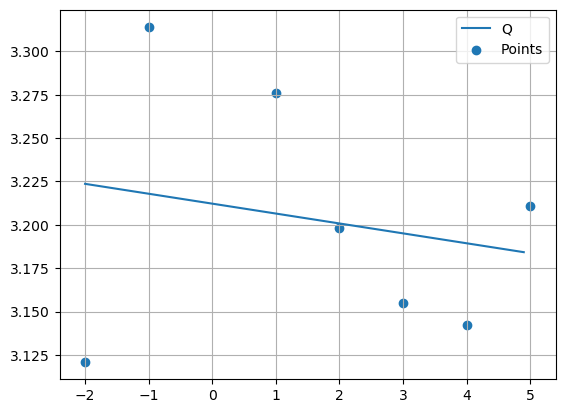

In [172]:
plt.plot(t, f1(t), label = 'Q')
plt.scatter(x_numbers, y_numbers, label = 'Points')
plt.grid()
plt.legend()
plt.show()